<a href="https://colab.research.google.com/github/Kenethoriga/FMCG_delivery_optimization/blob/main/FMCGDeliveryOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
1. Data Preparation

First, ensure you have the required data:

    Shop Data: Contains information about the shop locations, which include latitude and longitude.
    Fulfillment Center Data: Contains the location of fulfillment centers (warehouses) with their latitude and longitude.
```



In [8]:
import requests
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
url = 'https://raw.githubusercontent.com/Kenethoriga/FMCG_delivery_optimization/main/dataset.csv'
response = requests.get(url)
with open('dataset.csv', 'wb') as file:
    file.write(response.content)

url = 'https://raw.githubusercontent.com/Kenethoriga/FMCG_delivery_optimization/main/territories_centroids.csv'
response = requests.get(url)
with open('territories_centroids.csv', 'wb') as file:
    file.write(response.content)



In [10]:
# Load datasets
shops = pd.read_csv('dataset.csv')
centroids = pd.read_csv('territories_centroids.csv')

# Merge datasets based on territory
data = pd.merge(shops, centroids, on='territory')
data

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude,id,warehouse_latitude,warehouse_longitude
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155,12,-1.277078,36.814669
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155,12,-1.277078,36.814669
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155,12,-1.277078,36.814669
3,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Dawn Tissue Rolls Smart 40PC BALE (1.0 Bale),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155,12,-1.277078,36.814669
4,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Sawa Bath Soap 125G White DOZEN (1.0 Dzn),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155,12,-1.277078,36.814669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43713,4802cfab-74e0-4813-8b1f-2931f068f65f,ID_066466,15/03/2022,Camel Maize Flour 1KG BALE (20.0 PC),2,1194.83,0,0,14.00,Individual,Karatina,16/03/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678,6,-0.473139,37.126222
43714,5ff62a4e-d369-4e50-b049-9a1021792241,ID_066466,21/02/2022,Local White Sugar 50KG BAG (1.0 Item),4,6874.52,0,0,80.55,Individual,Karatina,22/02/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678,6,-0.473139,37.126222
43715,5ff62a4e-d369-4e50-b049-9a1021792241,ID_066466,21/02/2022,Dawn Pekee Tissue Rolls Jumbo BALE (1.0 Item),4,6874.52,0,0,80.55,Individual,Karatina,22/02/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678,6,-0.473139,37.126222
43716,5ff62a4e-d369-4e50-b049-9a1021792241,ID_066466,21/02/2022,Dawn Pekee Tissue Rolls 40PC BALE (1.0 Item),4,6874.52,0,0,80.55,Individual,Karatina,22/02/2022,14:00:00,08:00:00,Karatina Main - KDKE,-0.564060,37.074678,6,-0.473139,37.126222


In [21]:
# Prepare data for clustering
X = data[['duka_latitude', 'duka_longitude']].values
X

array([[ 3.67843000e-02,  3.76541553e+01],
       [ 3.67843000e-02,  3.76541553e+01],
       [ 3.67843000e-02,  3.76541553e+01],
       ...,
       [-5.64059600e-01,  3.70746785e+01],
       [-5.64059600e-01,  3.70746785e+01],
       [-5.64059600e-01,  3.70746785e+01]])

In [23]:
# Apply K-Means clustering
num_centroids = centroids.shape[0]
kmeans = KMeans(n_clusters=num_centroids, random_state=0).fit(X)
data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
# Create GeoDataFrames for plotting
geometry_shops = [Point(xy) for xy in zip(data['duka_longitude'], data['duka_latitude'])]
geometry_centroids = [Point(xy) for xy in zip(centroids['warehouse_longitude'], centroids['warehouse_latitude'])]

gdf_shops = gpd.GeoDataFrame(data, geometry=geometry_shops)
gdf_centroids = gpd.GeoDataFrame(centroids, geometry=geometry_centroids)

gdf_shops = gpd.GeoDataFrame(data, geometry=geometry_shops)
gdf_centroids = gpd.GeoDataFrame(centroids, geometry=geometry_centroids)

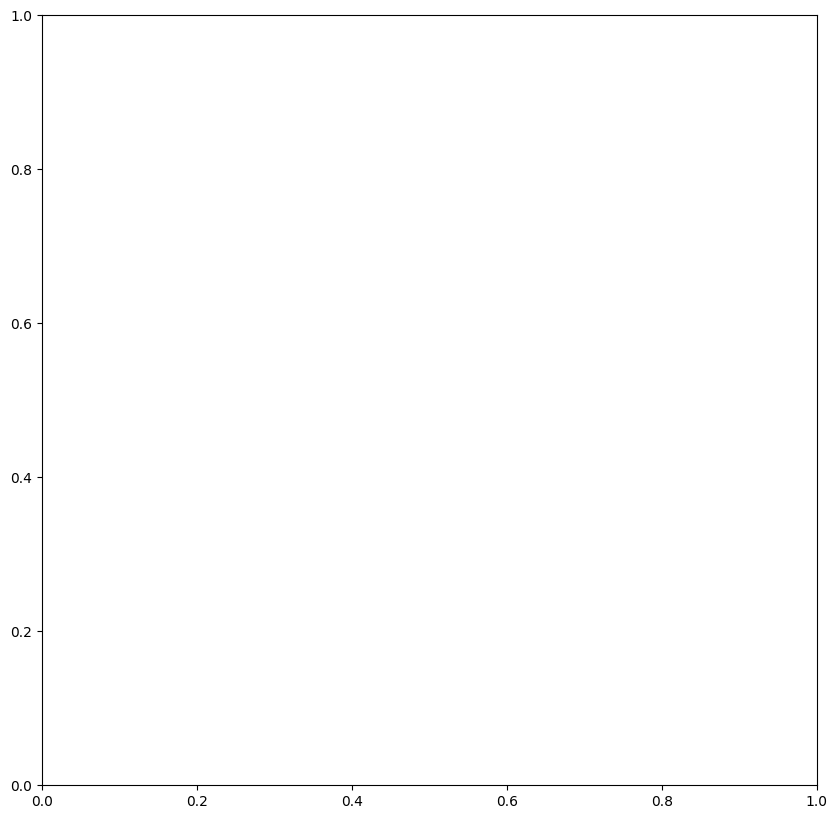

In [25]:
# Plotting the results
fig, ax = plt.subplots(figsize=(10, 10))

In [26]:
# Plot fulfillment centers
gdf_centroids.plot(ax=ax, color='red', markersize=100, label='Fulfillment Centers', alpha=0.7)

<Axes: >

<Figure size 640x480 with 0 Axes>

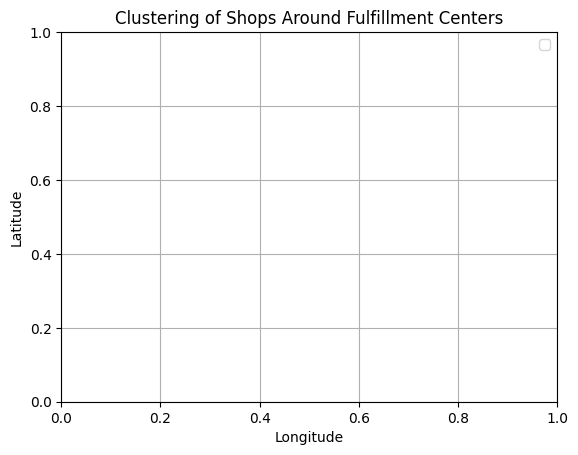

In [27]:
# Plot shops with different colors for each cluster
gdf_shops.plot(ax=ax, column='cluster', cmap='viridis', markersize=10, legend=True, alpha=0.5)

plt.title('Clustering of Shops Around Fulfillment Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()